In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	3
float64		column 3	1
float64		column 4	2
float64		column 5	1
float64		column 6	1
float64		column 7	3
float64		column 8	5
float64		column 9	4
float64		column 10	5
float64		column 11	6
float64		column 12	5


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,400.000000,397.000000,399.000000,398.000000,399.000000,399.000000,397.000000,395.000000,396.000000,395.000000,394.000000,395.000000
mean,-0.100319,0.073114,2.044777,1.898850,1.936111,1.976347,2.034799,1.992811,1.971823,2.016374,1.972069,1.968951
std,2.564450,2.756276,1.130536,1.147332,1.164398,1.146267,1.159383,1.137421,1.146801,1.162713,1.157283,1.185392
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.694850,-0.824930,1.124100,0.939107,0.879360,1.016865,1.032600,1.040250,1.006645,1.017050,0.913220,0.936035
50%,-0.068013,0.021200,2.093200,1.786250,1.927000,2.020800,2.102400,1.983300,2.074650,2.058500,1.931200,1.936400
75%,0.763967,0.887650,2.992350,2.803325,2.973200,2.966300,2.973900,3.033200,2.933775,3.044600,2.971500,3.002350
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

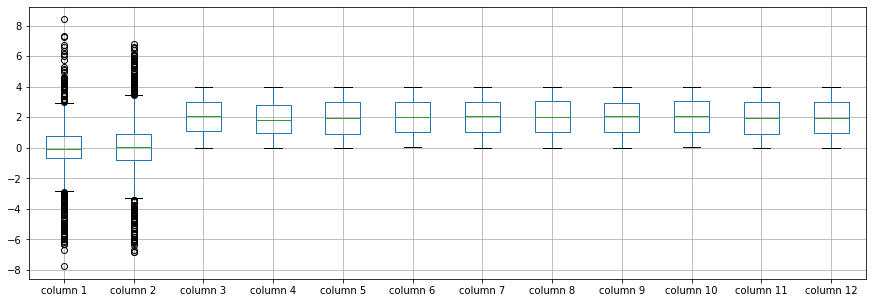

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.100319
column 2     0.073114
column 3     2.044777
column 4     1.898850
column 5     1.936111
column 6     1.976347
column 7     2.034799
column 8     1.992811
column 9     1.971823
column 10    2.016374
column 11    1.972069
column 12    1.968951
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.014765,-0.043042,-0.077609,0.007932,-0.004446,-0.020008,0.034221,-0.031304,0.045124,0.068187,-0.032764
column 2,0.014765,1.000000,-0.053490,0.037080,-0.083475,-0.087929,0.004973,-0.029034,-0.009640,0.014958,-0.038643,0.056824
column 3,-0.043042,-0.053490,1.000000,0.009173,-0.030371,-0.064436,-0.098161,0.070815,0.112947,-0.024973,-0.085637,-0.013525
column 4,-0.077609,0.037080,0.009173,1.000000,-0.010666,0.098827,0.011444,0.091280,-0.002142,0.072583,-0.014422,-0.042372
column 5,0.007932,-0.083475,-0.030371,-0.010666,1.000000,0.072295,0.037536,0.011363,-0.003667,0.017530,0.001469,-0.034119
column 6,-0.004446,-0.087929,-0.064436,0.098827,0.072295,1.000000,0.014161,0.068862,-0.001027,0.005754,0.023863,-0.028932
column 7,-0.020008,0.004973,-0.098161,0.011444,0.037536,0.014161,1.000000,-0.027886,0.075914,0.046359,0.015304,-0.067194
column 8,0.034221,-0.029034,0.070815,0.091280,0.011363,0.068862,-0.027886,1.000000,0.064335,-0.131623,-0.038516,-0.020754
column 9,-0.031304,-0.009640,0.112947,-0.002142,-0.003667,-0.001027,0.075914,0.064335,1.000000,0.000292,0.010112,0.042014
column 10,0.045124,0.014958,-0.024973,0.072583,0.017530,0.005754,0.046359,-0.131623,0.000292,1.000000,-0.002459,0.034656


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+27,12+27+27,12+27+27+27,12+27+27+27+27,12+27+27+27+27+27,12+27+27+27+27+27+27,12+27+27+27+27+27,12+27+27+27+27,12+27+27+27,12+27+27,12+27,12], vae_layer = False, seed = 27)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.739434814453126
Epoch: 1 , loss: 27.706306915283204
Epoch: 2 , loss: 27.645817794799804
Epoch: 3 , loss: 27.588926010131836
Epoch: 4 , loss: 27.548140716552734
Epoch: 5 , loss: 27.34040458679199
Epoch: 6 , loss: 26.91779884338379
Epoch: 7 , loss: 25.047932662963866
Epoch: 8 , loss: 22.740267715454102
Epoch: 9 , loss: 22.31935966491699
Epoch: 10 , loss: 21.919938888549805
Epoch: 11 , loss: 21.91931770324707
Epoch: 12 , loss: 21.29530418395996
Epoch: 13 , loss: 21.258164749145507
Epoch: 14 , loss: 20.716773757934572
Epoch: 15 , loss: 20.948321685791015
Epoch: 16 , loss: 21.078633728027345
Epoch: 17 , loss: 20.932435607910158
Epoch: 18 , loss: 20.283888244628905
Epoch: 19 , loss: 20.59405128479004
Epoch: 20 , loss: 20.018087921142577
Epoch: 21 , loss: 20.10654510498047
Epoch: 22 , loss: 19.930399475097655
Epoch: 23 , loss: 20.056560668945313
Epoch: 24 , loss: 20.03782356262207
Epoch: 25 , loss: 19.7454

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(10.083702143950108, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.0617592084361993

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AL_1(imp).xlsx", index=False, header=False)